# ***EDA For "Telco-Customer-Churn" dataset***

### Why this dataset?

In the future I would like to use the dataset to try and make a prediction model about customers that are about to churn/leave

(dataset and the follow content taken from kaggle)

 - Each row represents a customer
 - Each column contains customer's attibutes discribed below
 - The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support,       and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents


## ***COLUMNS DESCRIPTION:***



      customerID                          Unique ID assigned to each customer
      gender                              Customer’s gender
      SeniorCitizen                       Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
      Partner                             Indicates if the customer has a partner(example: Husband/Wife) (Yes/No)
      Dependents                          Indicates if the customer has dependents (example: children) (Yes/No)
      tenure                              Number of months the customer has stayed with the company
      PhoneService                        Indicates if the customer subscribes to phone service (Yes/No)
      MultipleLines                       Indicates if customer has multiple phone lines (Yes/No/No phone service)
      InternetService                     Type of internet service (DSL/Fiber optic/No)
      OnlineSecurity                      Online security service (Yes/No/No internet service)
      OnlineBackup                        Online backup service (Yes/No/No internet service)
      DeviceProtection                    Device protection plan (Yes/No/No internet service)
      TechSupport                         Tech support service (Yes/No/No internet service)
      StreamingTV                         Streaming TV service (Yes/No/No internet service)
      StreamingMovies                     Streaming movies service (Yes/No/No internet service)
      Contract                            Contract term (Month-to-month, One year, Two year)
      PaperlessBilling                    Indicates if customer opts for paperless billing (Yes/No)
      PaymentMethod                       Payment method (e.g., 'Electronic check', 'Mailed check', etc.)
      MonthlyCharges                      Amount charged to the customer monthly (in USD)
      TotalCharges                        Total amount charged to the customer (in USD)
      Churn                               Indicates if the customer has left (Yes/No)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
data = pd.read_csv('./datasets/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- some string type are present as object, and can be convert to string and maby to booloan or category types

In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- all columns with 2 to 4 values can be category type
- we got 2 columns that are numeric ('MonthlyCharges','TotalCharges') - 'TotalCharges' need convertion
- 'SeniorCitizen' and 'tenure' will be count as numeric as well

# <b>Convertion</b>

In [9]:
data = data.convert_dtypes()

In [10]:
#convert 'TotalCharges' to float
# errors='coerce' convert missing values (like blank strings) into NaN
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
# check info after the convertion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   Int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   Int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


# Missing Values

##### find missing values in numeric columns after convertion

In [12]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
missing_counts = data[numeric_cols].isna().sum()

print("Missing values in each numeric column:")
print(missing_counts)

Missing values in each numeric column:
tenure             0
MonthlyCharges     0
TotalCharges      11
SeniorCitizen      0
dtype: int64


 - to_numeric() with errors='coerce' will add NaN for missing values
 - isna() is looking for NaN in the data
 - as we see: 11 rows in  TotalCharges has missing values ( I might remove them or calculate them - (tenure * monthly pay)

#### calculate missing values in TotalCharges column

In [13]:
# finding the rows that are with NaN and create df
nan_data = data['TotalCharges'].isna()
nan_df = data[nan_data]
nan_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,<NA>,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,<NA>,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,<NA>,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,<NA>,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,<NA>,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,<NA>,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,<NA>,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,<NA>,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,<NA>,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,<NA>,No


In [14]:
# trying to calculate the missing totalCharges
calculated = data.loc[nan_data].apply(lambda row: row['tenure'] * row['MonthlyCharges'], axis=1)
calculated

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
dtype: float64

 -  we can see the result for the calculation is 0 - the reson is tenure is equal to 0 in records
 -  I need to remove the rows with tenure 0 - **assuming customer with 0 monthes are not realy customers and can't churn**

### remove rows with tenure 0 

In [15]:
index_to_drop = data[data['tenure'] == 0].index
data.drop(index=index_to_drop, inplace=True)

In [16]:
# chack that the rows removed
nan_data = data['TotalCharges'].isna()
nan_df = data[nan_data]
nan_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Gender And Churn

In [17]:
female = data[data['gender'] == 'Female']

In [18]:
female.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3483.0,0.163078,0.36949,0.0,0.0,0.0,0.0,1.0
tenure,3483.0,32.290841,24.450235,1.0,9.0,29.0,55.0,72.0
MonthlyCharges,3483.0,65.216652,30.070508,18.4,35.9,70.65,89.85,118.75
TotalCharges,3483.0,2283.190985,2270.830254,18.85,402.875,1387.35,3819.8,8672.45


In [19]:
male = data[data['gender'] == 'Male']

In [20]:
male.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3549.0,0.161736,0.36826,0.0,0.0,0.0,0.0,1.0
tenure,3549.0,32.550296,24.640929,1.0,9.0,29.0,56.0,72.0
MonthlyCharges,3549.0,64.387546,30.099725,18.25,35.4,70.1,89.9,118.35
TotalCharges,3549.0,2283.407861,2263.100874,18.8,397.0,1404.65,3771.5,8684.8


- woman count is a bit less then man count (66 more male)
- the details in all numeric columns are with minor difference between gender

# ***Correlations, Groupby And Crosstabs***

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
tenure,7032.0,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8


### 1. SeniorCitizen

#### Mean: 0.1624
 - about 16.24% of customers in the dataset are senior citizens, while  about 84% are not
 - Minimum and quartiles are all 0, and the maximum is 1, because this is a binary column (0 = not senior, 1 = senior)
______________________________________________
### 2. tenure

##### Mean: 32.42 months
 - The average customer has been with the company for a bit more then 32 months
##### 25%  9 months
##### Median (50%): 29 months
 - Half of the customers have a tenure of 29 months or less
##### 75%  55 months
 - This suggests a broad distribution of tenure from  9 months to 55 months
##### Minimum is 1 month, 
##### Maximum is 72 months
______________________________________________
### 3. MonthlyCharges

##### Mean: **$64.80**

##### 25%: **$35.59**

##### 50% (Median): **$70.35**

##### 75%: **$89.86**

 - one quarter of customers pay 35.59 USD (or less per month)
 - half pay 70.35 USD or less
 - a quarter pay above 89.86 USD
   
##### Maximum: **$118.75**
- The highest monthly charge in the dataset is 118.75 USD
  
##### STD 
 - shows there is a wide range in what customers pay monthly.
______________________________________________
### 4. TotalCharges

##### Mean: **$2283.30**

- the mean is greater than the median indicates a right-skewed distribution

##### 25%: **$401.45**

##### 50% (Median): **$1397.48**

##### 75%: **$3794.74**

 - A big jump between the 25th and 75th percentiles indicates high variance

##### Minimum: **$18.80**

##### Maximum: **$8684.80**

 - customer with low total charge to one with very high total charge, which supports the hige variance

### Correlation for numeric columns

In [25]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
sub_df = data[numeric_cols].copy()
sub_df['TotalCharges']=pd.to_numeric(sub_df['TotalCharges'], errors='coerce')
sub_df['MonthlyCharges']=pd.to_numeric(sub_df['MonthlyCharges'], errors='coerce')

In [26]:
# just checking the numeric columns
sub_df.dtypes

tenure              Int64
MonthlyCharges    Float64
TotalCharges      Float64
SeniorCitizen       Int64
dtype: object

In [27]:
# cooreation check
sub_df.corr()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.246862,0.825880,0.015683
MonthlyCharges,0.246862,1.000000,0.651065,0.219874
TotalCharges,0.825880,0.651065,1.000000,0.102411
SeniorCitizen,0.015683,0.219874,0.102411,1.000000


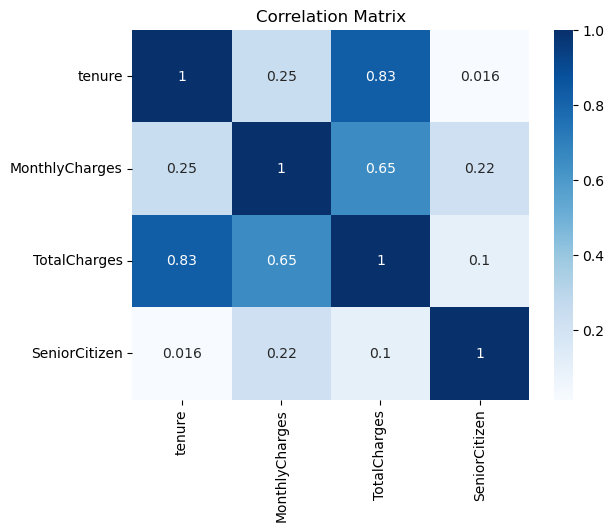

In [28]:
corr_matrix = sub_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

<table>
    <tr>
        <td>Pair</td>
        <td>Correlation</td>
        <td>Interpretation</td>
    </tr>
    <tr>
        <td>tenure & TotalCharges</td>
        <td>0.83</td>
        <td>strong positive: longer-tenured customers tend to have higher total charges over time.</td>
    </tr>
    <tr>
        <td>MonthlyCharges & TotalCharges</td>
        <td>0.65</td>
        <td>positive: higher monthly fees lead to higher total charges overall.</td>
    </tr>
     <tr>
        <td>tenure & MonthlyCharges</td>
        <td>0.25</td>
        <td>weak positive: customers staying longer slightly tend to have higher monthly charges, but not by a                                                      large amount.</td>
    </tr>
</table>

### ***Do customers with higher churn rate have shorter tenure?***

In [29]:
data.groupby('Churn')['tenure'].max()
#churners = data[data['Churn'] == 'Yes']
#non_churners = data[data['Churn'] == 'No']
#print(f"{len(churners)} churners and {len(non_churners)} Non-churners")

Churn
No     72
Yes    72
Name: tenure, dtype: Int64

In [30]:
data.groupby('Churn')['tenure'].min()

Churn
No     1
Yes    1
Name: tenure, dtype: Int64

In [31]:
data.groupby('Churn')['tenure'].mean()

Churn
No      37.65001
Yes    17.979133
Name: tenure, dtype: Float64

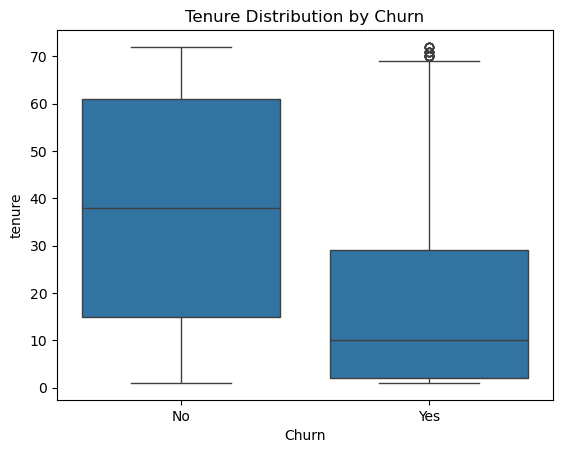

In [32]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure Distribution by Churn')
plt.show()

In [33]:
data.groupby('Churn')[['tenure']].describe().T

Churn               No        Yes
tenure count    5163.0     1869.0
       mean   37.65001  17.979133
       std    24.07694  19.531123
       min         1.0        1.0
       25%        15.0        2.0
       50%        38.0       10.0
       75%        61.0       29.0
       max        72.0       72.0

<p>The average Number of months that a customer has stayed with the company before churn is 18 months</p>
<br>
<p>Customers who stay (Churn = No) => have a much longer average tenure (38 months) </p>                                      
<p>than those who leave (Churn = Yes) => who only stay on average 18 months</p>

## MonthlyCharges and Churn

In [34]:
data.groupby('Churn')['MonthlyCharges'].describe().T

Churn,No,Yes
count,5163.0,1869.0
mean,61.307408,74.441332
std,31.094557,24.666053
min,18.25,18.85
25%,25.1,56.15
50%,64.45,79.65
75%,88.475,94.2
max,118.75,118.35


Count - There are more non-churners than churners in the dataset.

Mean  - Churners pay 13 USD more per month on average than non-churners. (this gap suggests that higher bills may be a factor to churn).

Std	  - Non-churners have a wider range of monthly charges; churners’ charges vary less. indicating more variety in how much Non-churners pay

Min	  - Both groups can have relatively low charges (around 18–19 USD).

25%	  - of non-churners pay less than 25.10, while 25% of churners pay more than 56.15. (Big difference). 

50%   - The median churner pays significantly more monthly than the median non-churner.

75%	  - In the upper quartile, churners still pay a bit more per month.

Max	  - The maximum monthly charge is similar in both groups.
____________________________________________________________________________________________________________________________________________________
Customers who pay more per month are with higher probability to churn, 

higher monthly charges correlate with higher churn rates.

Among customers who did not churn (Churn == No), 25% pay $25.10 or less per month.

Among customers who did churn (Churn == Yes), 25% pay $56.15 or less per month.

### - ***Do customers with longer period contracts churn less? / do customers with short period contract churn more?***
### - ***Churn vs. Contract***

In [35]:
# percentage (normalize='index')
pd.crosstab(data['Contract'], data['Churn'], normalize='index') 

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487


In [36]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


<p>Month-to-Month payers - 57% stays, 43%  churn</p>
<p>One year payers -  89% stays, 11%  churn</p>
<p>Two years payers - 97% stays, 3% churn</p>

- Month-to-month customers have the highest churn rate, maby because thay got less barriers to cancel
- Shorter contract = higher churn 

### Do payment methods affect customer churn?
## ***Churn vs. PaymentMethod***

In [37]:
# percentage (normalize='index')
pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832685,0.167315
Credit card (automatic),0.847469,0.152531
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


In [38]:
pd.crosstab(data['PaymentMethod'], data['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


### clearly Electronic check has the highest churn rate (45%)
#### asuumbtions:
 - maby this customer are more alert for each monthly payment
 - and on month-to-monthe it easier to cancel as we already saw
 - customer that are more digital oriented might follow their payments more efficient

### while the rest of the payment method has 15% to 19% churn rate
#### asuumbtions:
this could be because it is more convenience or this type of payments are get checked less (among other bills in the payment card)
more like "set payment once and forget about it" approch 


### Does Paperless Billing affect customers churn?
## ***Churn vs. PaperlessBilling***

In [39]:
# percentage (normalize='index')
pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index')

Churn,No,Yes
PaperlessBilling,,
No,0.836243,0.163757
Yes,0.664107,0.335893


In [40]:
pd.crosstab(data['PaperlessBilling'], data['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


##### The churn rate is double (16% vs 34%) for customers that has paperless billing
  #### asuumbtions:
- maby the customers that have the paperless billing get the bill by email or other digital way 
  and they might follow their payments more efficient
- it might be demographic difference like younger vs older - older people prefer the paper billing and younger the paperless billing
- on the other hand, people with a paperless account might be less aware of their bills (the opossite of what I claimed before) 
  than people with a paper account, and when an incorrect charge occurs, it may cause them to become frustrated and churn.


### Which internet service type has the highest churn rate?
## ***Churn vs. InternetService Type***

In [41]:
# percentage (normalize='index')
pd.crosstab(data['InternetService'], data['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


In [42]:
pd.crosstab(data['InternetService'], data['Churn'])

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


- DSL has 19% churn rate
- Fiber optic have 42% churn rate
- No Internet 7.5% churn rate

##### Fiber optic have the highest churn rate, indicate that:
- higher costs for fiber leads to churn
- the expectation from that service package (FIBER are better) leads to disappointment 
- competitive market for faster internet might lead to switching providers with better offers

### Do senior citizens have a higher churn rate?
## ***Churn vs. SeniorCitizen***

In [43]:
# percentage (normalize='index')
pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763497,0.236503
1,0.583187,0.416813


In [44]:
pd.crosstab(data['SeniorCitizen'], data['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


#### that shows that senior citizens has higher churn rate
#### more asuumbtions:
- Seniors might be more sensitive to price increases
- they use less Tech services that they need to pay for
- other providers that has senior citizens discounts or simpler plan package


### Do customers with partners have a higher churn rate?
## ***Churn vs. Partner***

In [45]:
# percentage (normalize='index')
pd.crosstab(data['Partner'], data['Churn'], normalize='index')

Churn,No,Yes
Partner,,
No,0.670239,0.329761
Yes,0.802829,0.197171


In [46]:
pd.crosstab(data['Partner'], data['Churn'])

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


##### Having a partner shows lower churn rate, the difference is 13%
- Customers with a partner may share bills or have more stable finances, less cancelation propbility
- The more people depend on the service, the more complicated it is to cancel, the more bureaucracy and coordination with the partner


### MultipleLines effect churn rate?
## ***Churn vs. MultipleLines***

In [67]:
pd.crosstab(data['MultipleLines'], data['Churn'])

Churn,No,Yes
MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850


In [68]:
# percentage (normalize='index')
pd.crosstab(data['MultipleLines'], data['Churn'], normalize='index')

Churn,No,Yes
MultipleLines,,
No,0.749188,0.250812
No phone service,0.750000,0.250000
Yes,0.713515,0.286485


- customers with multiple lines have a higher churn rate (28.6%) than those with no multiple lines (25.1%) or no phone service (25.0%).
- the gap isn’t big , but it’s consistent across the data.
- maby customers with multiple lines might churn becuse higher costs, or other factors

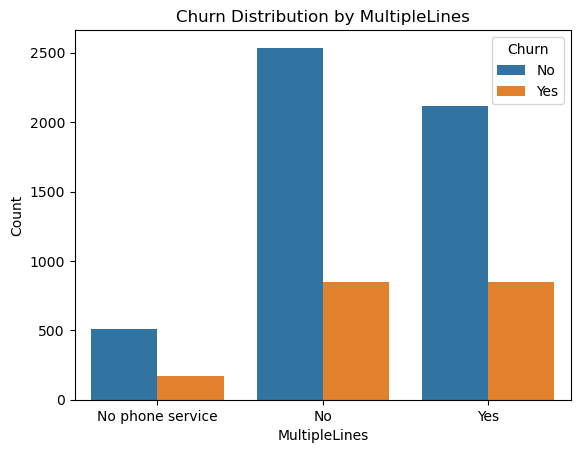

In [70]:
sns.countplot(data=data, x='MultipleLines', hue='Churn')

plt.title("Churn Distribution by MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.show()

## ***All Crosstabs Visualization***

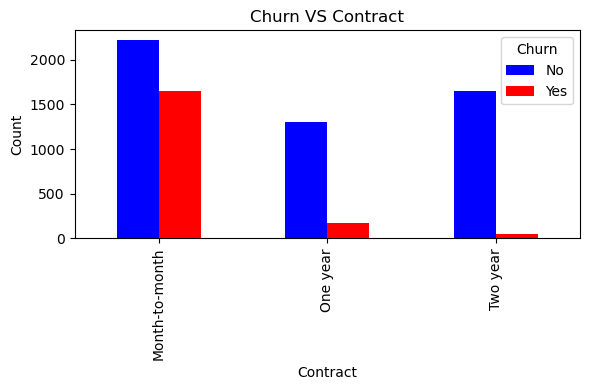

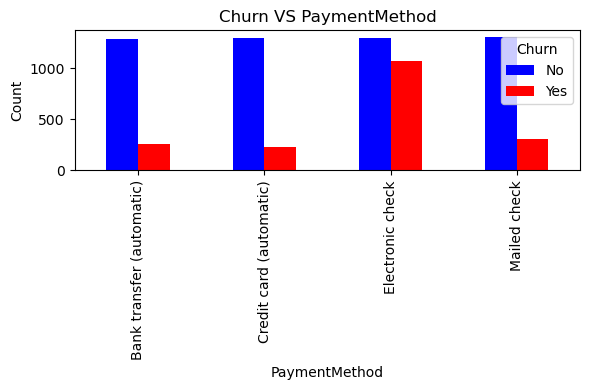

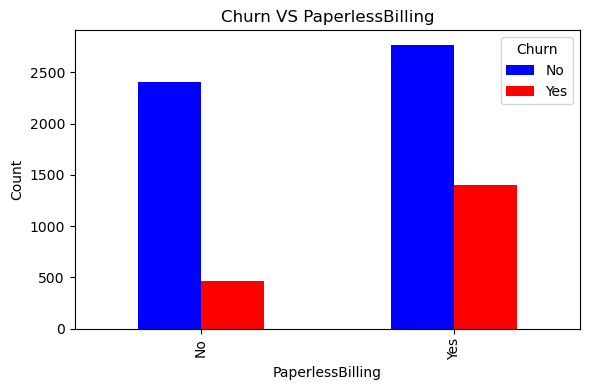

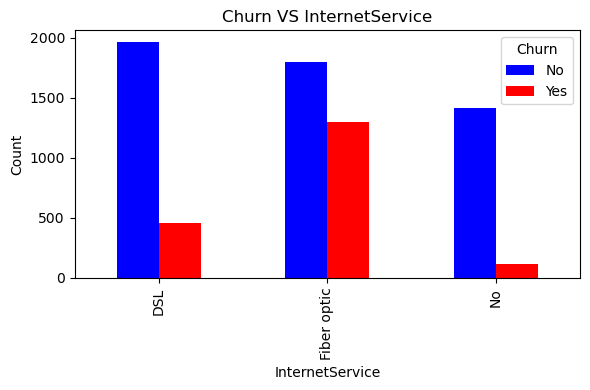

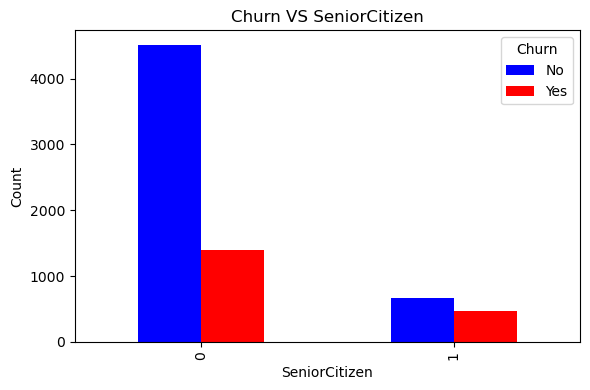

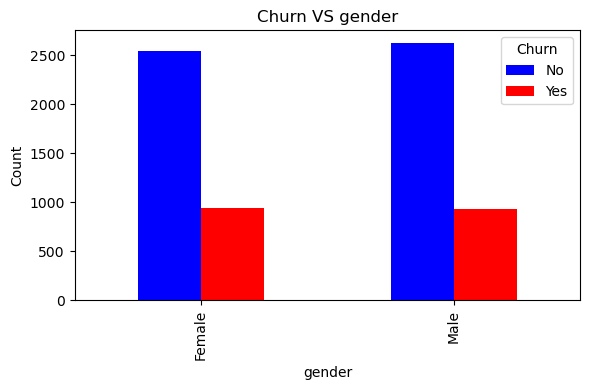

In [5]:
categorical_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling', 
                    'InternetService', 'SeniorCitizen','gender']

for col in categorical_cols:
    cross_tab = pd.crosstab(data[col], data['Churn'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red'], 
                   figsize=(6, 4))
    
    plt.title(f'Churn VS {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

## ***T-Test***

#### T-Test for churn and monthly charges

T-statistic: 18.3409
P-value: 2.6574e-72
Result: Significant difference in average monthly charges between churners and non-churners.


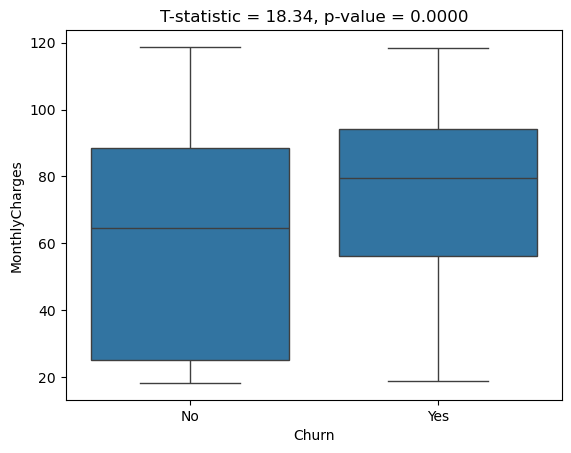

In [47]:
# Separate the MonthlyCharges data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'MonthlyCharges']
churn_no = data.loc[data['Churn'] == 'No', 'MonthlyCharges']

# equal_var=False (Welch's Variant - which does not assume equal population) ????
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in average monthly charges between churners and non-churners.")
else:
    print("Result: No significant difference in average monthly charges between churners and non-churners.")

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

#### T-test for churn and tenure

T-statistic: -34.9719
P-value: 2.3471e-234
Result: Significant difference in tenure between churners and non-churners.


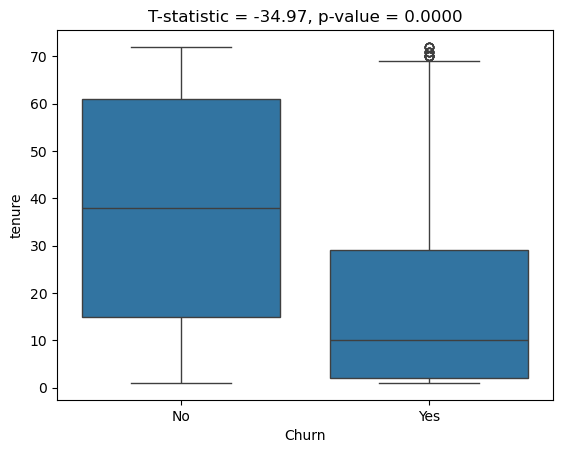

In [48]:
# Separate the tenure data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'tenure']
churn_no = data.loc[data['Churn'] == 'No', 'tenure']

# equal_var=False meaning its a Welch's Variant (which does not assume equal population)
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in tenure between churners and non-churners.")
else:
    print("Result: No significant difference in tenure between churners and non-churners.")

sns.boxplot(x='Churn', y='tenure', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

### Distribution plots (Tenure,MonthlyCharges,TotalCharges)

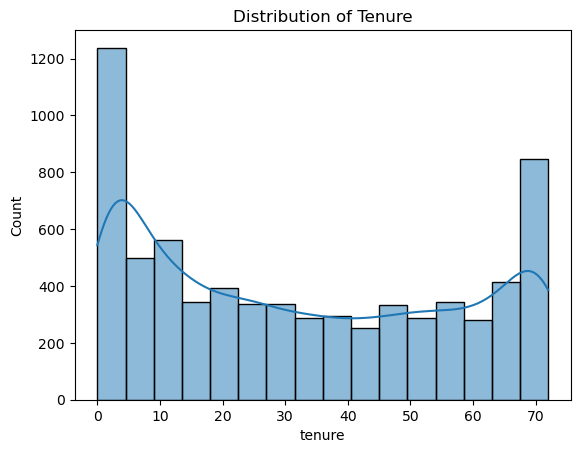

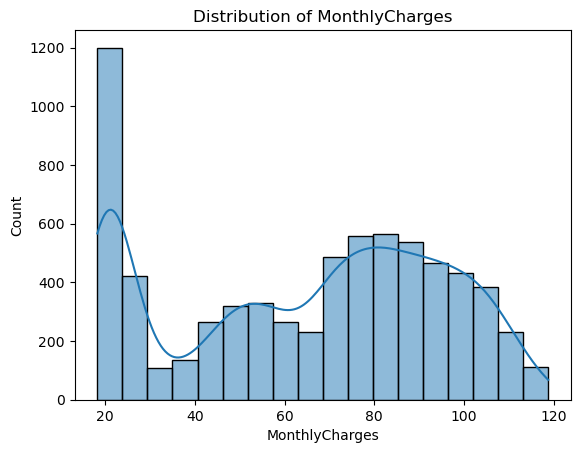

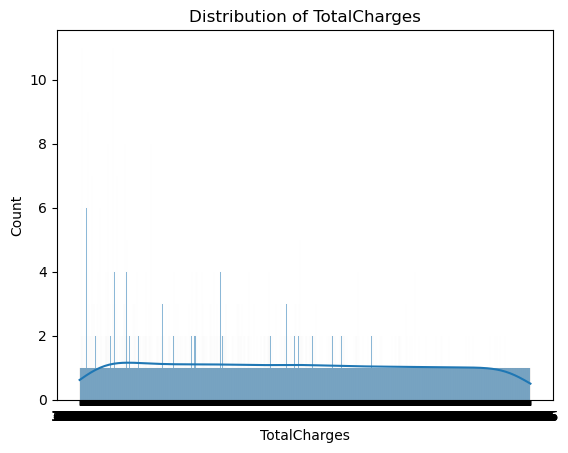

In [12]:
# For Tenure (Number of months the customer has stayed with the company)
sns.histplot(data=data, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.show()

# For MonthlyCharges
sns.histplot(data=data, x='MonthlyCharges', kde=True)
plt.title('Distribution of MonthlyCharges')
plt.show()

# For TotalCharges (after converting to numeric, if needed)
sns.histplot(data=data, x='TotalCharges', kde=True)
plt.title('Distribution of TotalCharges')
plt.show()

### Distribution of Tenure 
- There is a big jump near 1–2 months, indicating many new joined customers.
- around 20-40 monthes the frequency drops and remaing relative low
- weird jump around 70 monthes - maby long term customers??
### Distribution of MonthlyCharges
- most customers pay around 20 USD (low payment) - maby only one service plan like only phone
- looks like a right skewed distribution - maby small group of customers get all services and pay higher charge per month
### Distribution of TotalCharges
- the plot shows a wide spread of payments with minor right skewed 

## other approch to groupby churn and numerical columns with Kurtosis

In [28]:
from scipy.stats import kurtosis

result = data.groupby('Churn', observed=True).agg(
    Mean_MonthlyCharges=('MonthlyCharges', 'mean'),
    Median_MonthlyCharges=('MonthlyCharges', 'median'),
    Kurtosis_MonthlyCharges=('MonthlyCharges', lambda x: kurtosis(x, fisher=True, bias=False)),
    
    Mean_TotalCharges=('TotalCharges', 'mean'),
    Median_TotalCharges=('TotalCharges', 'median'),
    Kurtosis_TotalCharges=('TotalCharges', lambda x: kurtosis(x, fisher=True, bias=False))
)

result

,Mean_MonthlyCharges,Median_MonthlyCharges,Kurtosis_MonthlyCharges,Mean_TotalCharges,Median_TotalCharges,Kurtosis_TotalCharges
Churn,,,,,,
No,61.265124,64.425,-1.355301,2555.344141,1683.60,NaN
Yes,74.441332,79.650,-0.361516,1531.796094,703.55,1.461704


# Customer counts for services use

In [55]:
# 1. PhoneService: Count "Yes"
phone_yes_count = data['PhoneService'].eq('Yes').sum()
print("Number of customers with PhoneService =", phone_yes_count)
print("---------------------------------------------------------------")

# 2. MultipleLines: Count "Yes"
multiple_lines_count = data['MultipleLines'].eq('Yes').sum()
print("Number of customers with MultipleLines =", multiple_lines_count)
print("---------------------------------------------------------------")

# 3. InternetService: Count  DSL or Fiber optic
internet_count = data['InternetService'].isin(['DSL', 'Fiber optic']).sum()
print("Number of customers with InternetService (DSL/Fiber optic) =", internet_count)
print("---------------------------------------------------------------")

# 4. OnlineSecurity: Count  "Yes"
online_security_count = data['OnlineSecurity'].eq('Yes').sum()
print("Number of customers with OnlineSecurity =", online_security_count)
print("---------------------------------------------------------------")

# 5. OnlineBackup: Count "Yes"
online_backup_count = data['OnlineBackup'].eq('Yes').sum()
print("Number of customers with OnlineBackup =", online_backup_count)
print("---------------------------------------------------------------")

# 6. DeviceProtection: Count "Yes"
device_protection_count = data['DeviceProtection'].eq('Yes').sum()
print("Number of customers with DeviceProtection =", device_protection_count)
print("---------------------------------------------------------------")

# 7. TechSupport: Count "Yes"
tech_support_count = data['TechSupport'].eq('Yes').sum()
print("Number of customers with TechSupport =", tech_support_count)
print("---------------------------------------------------------------")

# 8. StreamingTV: Count "Yes"
streaming_tv_count = data['StreamingTV'].eq('Yes').sum()
print("Number of customers with StreamingTV =", streaming_tv_count)
print("---------------------------------------------------------------")

# 9. StreamingMovies: Count "Yes"
streaming_movies_count = data['StreamingMovies'].eq('Yes').sum()
print("Number of customers with StreamingMovies =", streaming_movies_count)
print("---------------------------------------------------------------")
print(f" of total {len(data)} customer")

Number of customers with PhoneService = 6352
---------------------------------------------------------------
Number of customers with MultipleLines = 2967
---------------------------------------------------------------
Number of customers with InternetService (DSL/Fiber optic) = 5512
---------------------------------------------------------------
Number of customers with OnlineSecurity = 2015
---------------------------------------------------------------
Number of customers with OnlineBackup = 2425
---------------------------------------------------------------
Number of customers with DeviceProtection = 2418
---------------------------------------------------------------
Number of customers with TechSupport = 2040
---------------------------------------------------------------
Number of customers with StreamingTV = 2703
---------------------------------------------------------------
Number of customers with StreamingMovies = 2731
------------------------------------------------------

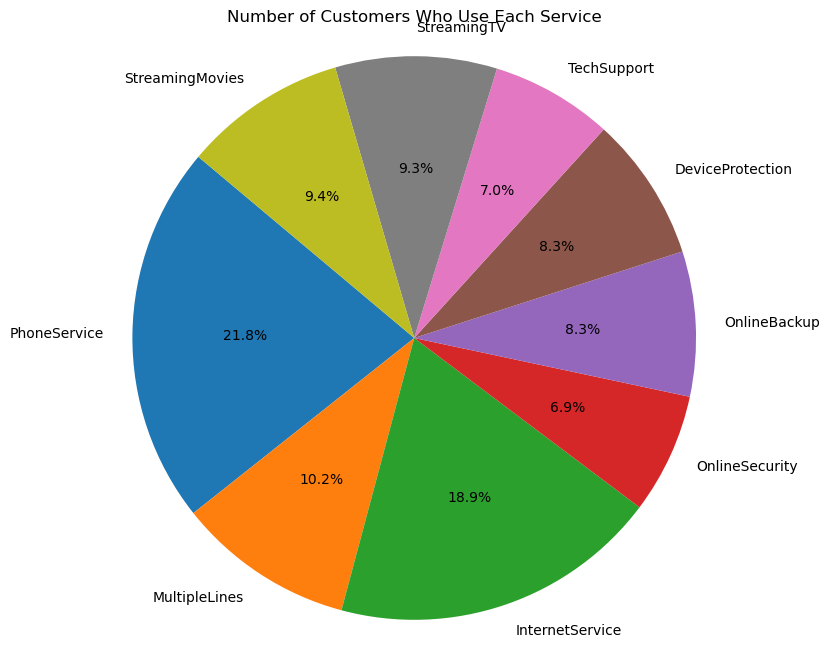

In [57]:
phone_yes_count = data['PhoneService'].eq('Yes').sum()
multiple_lines_count = data['MultipleLines'].eq('Yes').sum()
internet_count = data['InternetService'].isin(['DSL','Fiber optic']).sum()
online_security_count = data['OnlineSecurity'].eq('Yes').sum()
online_backup_count = data['OnlineBackup'].eq('Yes').sum()
device_protection_count = data['DeviceProtection'].eq('Yes').sum()
tech_support_count = data['TechSupport'].eq('Yes').sum()
streaming_tv_count = data['StreamingTV'].eq('Yes').sum()
streaming_movies_count = data['StreamingMovies'].eq('Yes').sum()

service_counts = {
    'PhoneService': phone_yes_count,
    'MultipleLines': multiple_lines_count,
    'InternetService': internet_count,
    'OnlineSecurity': online_security_count,
    'OnlineBackup': online_backup_count,
    'DeviceProtection': device_protection_count,
    'TechSupport': tech_support_count,
    'StreamingTV': streaming_tv_count,
    'StreamingMovies': streaming_movies_count
}

# Create labels and values for pie chart
labels = list(service_counts.keys())
values = list(service_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Number of Customers Who Use Each Service')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


# number of services for each customer 

In [65]:
data['NumServices'] = (
    data['PhoneService'].eq('Yes').astype(int) +
    data['MultipleLines'].eq('Yes').astype(int) +
    data['InternetService'].isin(['DSL', 'Fiber optic']).astype(int) +
    data['OnlineSecurity'].eq('Yes').astype(int) +
    data['OnlineBackup'].eq('Yes').astype(int) +
    data['DeviceProtection'].eq('Yes').astype(int) +
    data['TechSupport'].eq('Yes').astype(int) +
    data['StreamingTV'].eq('Yes').astype(int) +
    data['StreamingMovies'].eq('Yes').astype(int)
)

# Show how many services each row uses (add NumServices column to dataset)
print(data[['customerID', 'NumServices', 'MonthlyCharges']].head(20))

    customerID  NumServices  MonthlyCharges
0   7590-VHVEG            2           29.85
1   5575-GNVDE            4           56.95
2   3668-QPYBK            4           53.85
3   7795-CFOCW            4            42.3
4   9237-HQITU            2            70.7
5   9305-CDSKC            6           99.65
6   1452-KIOVK            5            89.1
7   6713-OKOMC            2           29.75
8   7892-POOKP            7           104.8
9   6388-TABGU            4           56.15
10  9763-GRSKD            3           49.95
11  7469-LKBCI            1           18.95
12  8091-TTVAX            6          100.35
13  0280-XJGEX            7           103.7
14  5129-JLPIS            7           105.5
15  3655-SNQYZ            9          113.25
16  8191-XWSZG            1           20.65
17  9959-WOFKT            7           106.7
18  4190-MFLUW            4            55.2
19  4183-MYFRB            5           90.05


#### coorelation between number of services and monthlyCharges

In [71]:

corr_matrix = data[['NumServices', 'MonthlyCharges']].corr()
print(corr_matrix)

                NumServices  MonthlyCharges
NumServices        1.000000        0.851408
MonthlyCharges     0.851408        1.000000


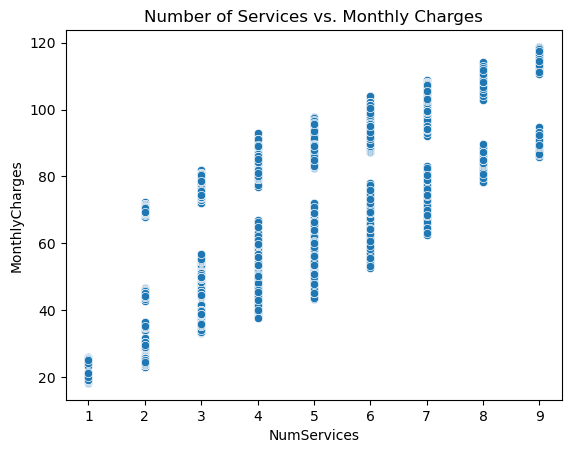

In [72]:
sns.scatterplot(data=data, x='NumServices', y='MonthlyCharges')
plt.title('Number of Services vs. Monthly Charges')
plt.show()

 - strong correlation between number of services per customer to monthly charge